In [82]:
# !pip install vis
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as pltimport vis
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

(50000, 32, 32, 3)


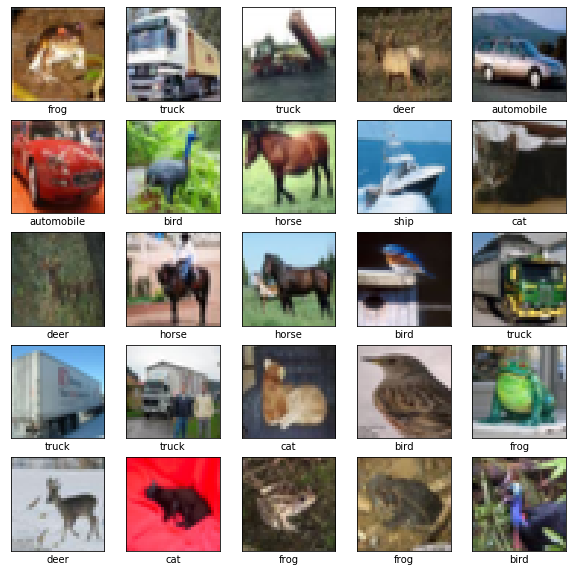

In [18]:
print(train_images.shape)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 28s 553us/sample - loss: 1.4962 - accuracy: 0.4565 - val_loss: 1.2470 - val_accuracy: 0.5569
Epoch 2/3
50000/50000 [==============================] - 30s 590us/sample - loss: 1.1273 - accuracy: 0.6041 - val_loss: 1.0613 - val_accuracy: 0.6271
Epoch 3/3
50000/50000 [==============================] - 30s 598us/sample - loss: 0.9714 - accuracy: 0.6588 - val_loss: 1.0093 - val_accuracy: 0.6481


10000/10000 - 1s - loss: 0.8725 - accuracy: 0.7059


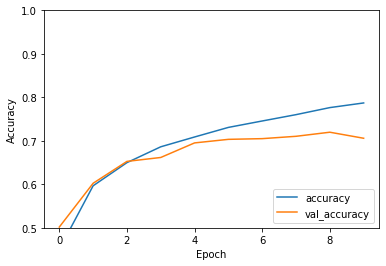

In [111]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [8]:
### 
print(train_images.shape)
print(type(train_images.shape))
print(type(train_images[1]))

(50000, 32, 32, 3)
<class 'tuple'>
<class 'numpy.ndarray'>


In [14]:
import numpy as np
import shap

In [11]:
# select a set of background examples to take an expectation over
background = train_images[np.random.choice(train_images.shape[0], 100, replace=False)]

In [12]:
background.shape

(100, 32, 32, 3)

In [15]:
e = shap.DeepExplainer(model, background)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [119]:
# ! pip install shap
import shap

In [127]:
e.shap_values

<bound method DeepExplainer.shap_values of <shap.explainers.deep.DeepExplainer object at 0x19e837780>>

In [16]:
shap_values= e.shap_values(train_images[1:10])

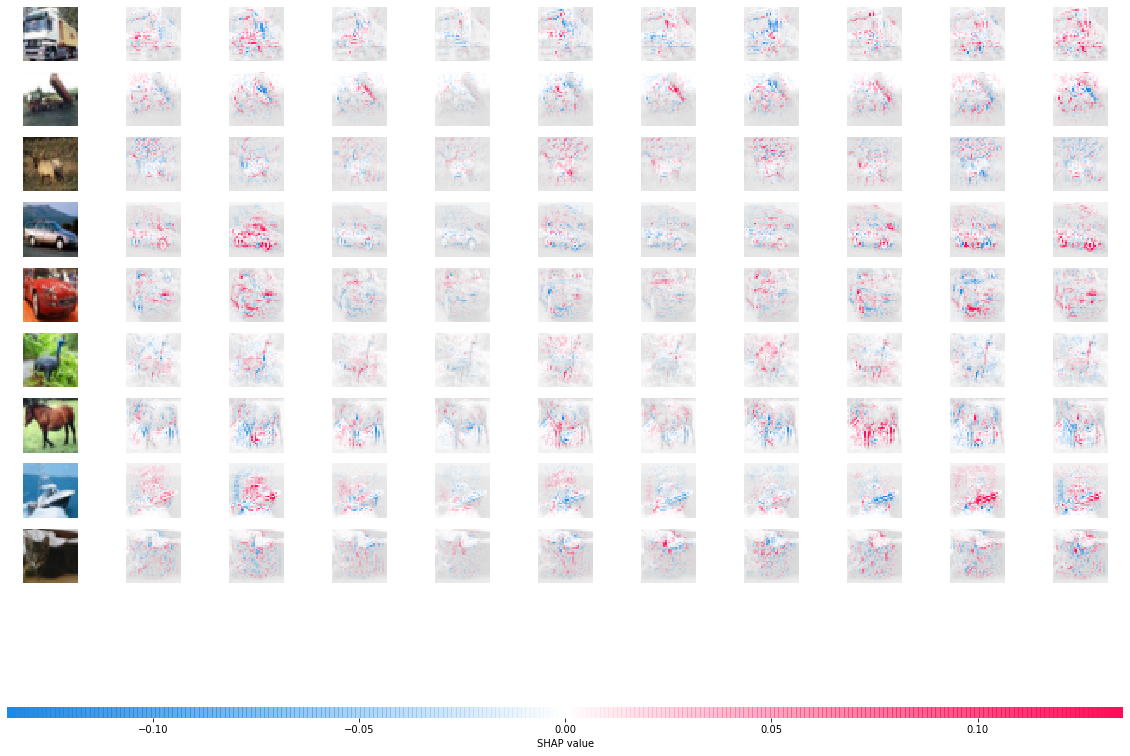

In [17]:
shap.image_plot(shap_values, train_images[1:10])

In [139]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)